In [1]:
import numpy as np
import pandas as pd
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

**BERNOULLI NAIVE BAYES**

Bernoulli Naive Bayes can only utilize columns that have binary (0/1, Yes/No) data. Hence, before the model is trained, we must one-hot encode all the columns in the dataset.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = iris.target

In [3]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
dataset.shape

(150, 4)

In [6]:
dataset.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

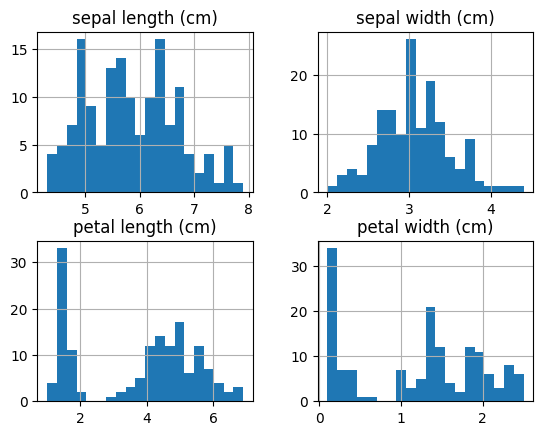

In [7]:
dataset.hist(bins=20)

In [8]:
X = dataset.to_numpy().astype(np.float64)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=20)

In [10]:
bnb = BernoulliNB(binarize=True)

In [11]:
bnb.fit(X_train, Y_train)

BernoulliNB(binarize=True)

In [12]:
Y_pred = bnb.predict(X_test)

In [13]:
accuracy_score(Y_pred, Y_test)

0.6333333333333333

Bernoulli Naive Bayes always gives a poor accuracy score with discrete (non-binary) and continuous values. This is because even after one-hot encoding the data, Bernoulli Naive-Bayes will not know what to do with an unseen data point. Hence, Bernoulli Naive Bayes must ONLY be used when all columns are in a binary form (Yes/No, Available/Not Available, Present/Absent, etc.)

**MULTINOMIAL NAIVE BAYES**

Multinomial Naive Bayes works on columns that have discrete values (doesn't have to be binary). It does not work on columns with negative values. Hence, before the model is trained, we must label encode the data.

In [14]:
from sklearn import preprocessing
orig_dataset = dataset

In [15]:
label_encoder = preprocessing.LabelEncoder()
dataset['sepal length (cm)']= label_encoder.fit_transform(dataset['sepal length (cm)'])

In [16]:
label_encoder = preprocessing.LabelEncoder()
dataset['sepal width (cm)']= label_encoder.fit_transform(dataset['sepal width (cm)'])

In [17]:
label_encoder = preprocessing.LabelEncoder()
dataset['petal length (cm)']= label_encoder.fit_transform(dataset['petal length (cm)'])

In [18]:
label_encoder = preprocessing.LabelEncoder()
dataset['petal width (cm)']= label_encoder.fit_transform(dataset['petal width (cm)'])

In [19]:
X = dataset.to_numpy().astype(np.float64)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=20)

In [21]:
mnb = MultinomialNB()

In [22]:
mnb.fit(X_train, Y_train)

MultinomialNB()

In [23]:
Y_pred = mnb.predict(X_test)

In [24]:
accuracy_score(Y_pred, Y_test)

0.8333333333333334

Since the dataset consists of discrete values (The number of unique values in each column is a small fraction of the total number of data points), Multinomial Naive Bayes gives us a good accuracy score.

**GAUSSIAN NAIVE BAYES CLASSIFICATION**

Gaussian Naive Bayes works best on columns with continous values. It doesn't work as well on discrete data such as word counts because it assumes that features follow a Gaussian distribution. It's also not the ideal classification model to use when your data columns do not follow a Gaussian distribution. Let us consider another dataset to prove this point.

In [26]:
dataset = pd.read_csv('BankNote_Authentication.csv')

In [27]:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
dataset.shape

(1372, 5)

In [29]:
dataset.nunique()

variance    1338
skewness    1256
curtosis    1270
entropy     1156
class          2
dtype: int64

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>],
       [<Axes: title={'center': 'curtosis'}>,
        <Axes: title={'center': 'entropy'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

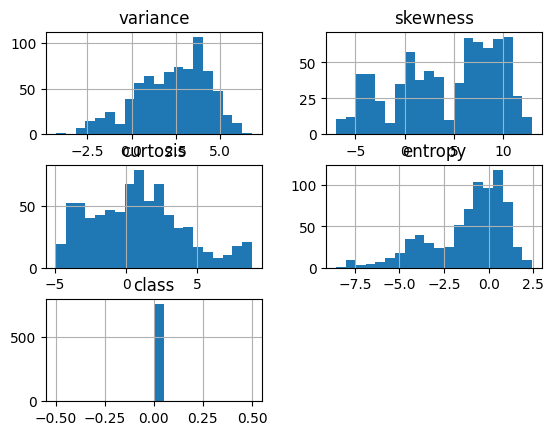

In [30]:
dataset[dataset['class']==0].hist(bins=20)

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>],
       [<Axes: title={'center': 'curtosis'}>,
        <Axes: title={'center': 'entropy'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

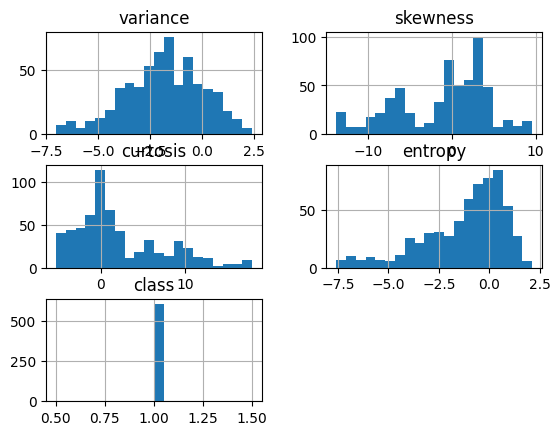

In [31]:
dataset[dataset['class']==1].hist(bins=20)

In [32]:
Y = dataset["class"].to_numpy().astype(np.float64)
X = dataset.drop(columns="class").to_numpy().astype(np.float64)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=20)

In [34]:
gnb = GaussianNB()


In [35]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [36]:
Y_pred = gnb.predict(X_test)

In [37]:
accuracy_score(Y_pred, Y_test)

0.850909090909091

This dataset consists of continuous values. Amongst the Naive Bayes models, Gaussian Naive Bayes is the best option for this classification problem. However, as seen above, the columns do not follow a Gaussian distribution. Hence, we might get even better accuracy scores using other classification models.

**LOGISTIC REGRESSION**

In [38]:
Y = dataset["class"].to_numpy().astype(np.float64)
X = dataset.drop(columns="class").to_numpy().astype(np.float64)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=20)

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
Y_pred = model.predict(X_test)

In [43]:
accuracy_score(Y_pred, Y_test)

0.9927272727272727

As you can see, Logistic Regression gives us a much better accuracy score than Gaussian Naive Bayes since it makes no assumptions about the underlying data. It is best suited for Binary Classification problems where most data points belonging to one class have a relatively low X value, and data points belonging to the other class have a relatively high X value.

## K Nearest Neighbours Classifier


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)

In [46]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
Y_pred = knn.predict(X_test)

In [48]:
accuracy_score(Y_pred, Y_test)

1.0